In [657]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from scipy.sparse import csgraph
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

user_col = ['A', 'B', 'C', 'D', 'F', 'G', 'H', 'I', 'J']
data = pd.read_table("abalone.data" , sep = ',', header = None, names = user_col)

In [288]:
data

,A,B,C,D,F,G,H,I,J
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [289]:
data['A'].unique()

array(['M', 'F', 'I'], dtype=object)

In [290]:
data['A'].value_counts()

M    1528
I    1342
F    1307
Name: A, dtype: int64

In [291]:
data.A = pd.Categorical(data.A).codes

In [293]:
data_copy = data

In [294]:
data_copy

,A,B,C,D,F,G,H,I,J
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [23]:
data['A'].value_counts()

2    1528
1    1342
0    1307
Name: A, dtype: int64

In [24]:
data = data.to_numpy()

In [25]:
data

array([[ 2.    ,  0.455 ,  0.365 , ...,  0.101 ,  0.15  , 15.    ],
       [ 2.    ,  0.35  ,  0.265 , ...,  0.0485,  0.07  ,  7.    ],
       [ 0.    ,  0.53  ,  0.42  , ...,  0.1415,  0.21  ,  9.    ],
       ...,
       [ 2.    ,  0.6   ,  0.475 , ...,  0.2875,  0.308 ,  9.    ],
       [ 0.    ,  0.625 ,  0.485 , ...,  0.261 ,  0.296 , 10.    ],
       [ 2.    ,  0.71  ,  0.555 , ...,  0.3765,  0.495 , 12.    ]])

In [103]:
class EffficientkNNclassification:
    
    def __init__(self):
        
        np.random.seed(0)
        pass
        
    def normalise_data(self, X):
        
        min_max_scaler = preprocessing.MinMaxScaler()
        X_scaled = min_max_scaler.fit_transform(X)
        
        return X_scaled
    
    def forward_pass(self, X, W, rho1, rho2):
        
        a = np.sqrt((np.matmul(X, W) - X) **2)
        b = np.sum(np.absolute(W), axis = 1)
        L = csgraph.laplacian(X[:, 1]*X[:, 1][:, np.newaxis], normed=False)
        c = np.matmul(np.matmul(np.matmul(np.matmul(np.transpose(W), np.transpose(X)), L), X), W) 
        
        return a + (rho1 * b) + (rho2 * np.trace(c))
    
    def loss_fn(self, X, W):
        
        return np.sum(np.sqrt(np.matmul(X, W) ** 2)) / X.shape[1]
    
    def update_weights(self, W):
        
        return np.sqrt(W**2) / (2 * np.sqrt(np.absolute(W)))
    
    
    def fit(self, X, epochs = 1, rho1 = 1, rho2 = 1, display_loss = True):
        
        X = self.normalise_data(X)
        X = np.transpose(X)
        W = np.random.randn(X.shape[1], X.shape[1])
        loss = []
        
        for i in tqdm(range(epochs)):
            
            self.forward_pass(X, W, rho1, rho2)
            loss.append(self.loss_fn(X, W))
            W = np.absolute(W) - 0.1 * self.update_weights(W)
            
        if display_loss:
            plt.style.use('ggplot')
            plt.figure(figsize = (5,5))
            plt.plot(loss, '-o', markersize = 5)
            plt.xlabel('Epoch')
            plt.ylabel('Loss')
            plt.show()
        #print(W)
        #print(W.shape)
        return W
        

In [104]:
model = EffficientkNNclassification()

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [02:30<00:00,  3.00s/it]


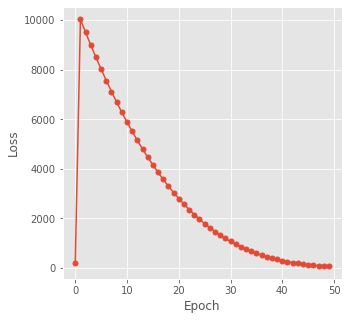

Wall time: 2min 30s


In [108]:
%%time
Weights = model.fit(data, epochs = 50, rho1 = 1e-4, rho2 = 1e-5)

In [109]:
Weights.shape

(4177, 4177)

In [110]:
Weights

array([[ 0.19284979, -0.000625  , -0.000625  , ..., -0.000625  ,
         0.05285095,  0.0168347 ],
       [-0.000625  ,  0.04349608, -0.000625  , ..., -0.000625  ,
        -0.000625  , -0.000625  ],
       [-0.00059696, -0.000625  , -0.000625  , ..., -0.000625  ,
         0.06740678, -0.000625  ],
       ...,
       [-0.000625  , -0.000625  , -0.000625  , ...,  0.05736394,
        -0.000625  , -0.000625  ],
       [-0.000625  , -0.000625  , -0.000625  , ..., -0.000625  ,
        -0.000625  , -0.000625  ],
       [-0.000625  , -0.000625  , -0.000625  , ..., -0.000625  ,
        -0.000625  , -0.000625  ]])

In [117]:
result = np.where(Weights < 0, 0, Weights)

In [118]:
result

array([[0.19284979, 0.        , 0.        , ..., 0.        , 0.05285095,
        0.0168347 ],
       [0.        , 0.04349608, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.06740678,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.05736394, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [126]:
result[0]

array([0.19284979, 0.        , 0.        , ..., 0.        , 0.05285095,
       0.0168347 ])

In [252]:
i = np.random.randint(1, 4177)
print(i)
print(result[i])
np.count_nonzero(result[i])

882
[0. 0. 0. ... 0. 0. 0.]


381

In [253]:
training_label = []
for i in range(len(result)):
    training_label.append(np.count_nonzero(result[i]) - 1)
    

In [266]:
result_dataframe = pd.DataFrame(training_label, columns = ["Labels"])

In [271]:
result_dataframe.to_csv('result_csv.csv')

In [295]:
final_data = pd.concat([data_copy, result_dataframe], axis = 1)

In [577]:
final_data

,A,B,C,D,F,G,H,I,J,Labels
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,340
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,361
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,368
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,348
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,358
...,...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,354
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,373
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,343
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,340


In [578]:
data_numpy = np.array(final_data)

In [579]:
data_numpy

array([[2.00e+00, 4.55e-01, 3.65e-01, ..., 1.50e-01, 1.50e+01, 3.40e+02],
       [2.00e+00, 3.50e-01, 2.65e-01, ..., 7.00e-02, 7.00e+00, 3.61e+02],
       [0.00e+00, 5.30e-01, 4.20e-01, ..., 2.10e-01, 9.00e+00, 3.68e+02],
       ...,
       [2.00e+00, 6.00e-01, 4.75e-01, ..., 3.08e-01, 9.00e+00, 3.43e+02],
       [0.00e+00, 6.25e-01, 4.85e-01, ..., 2.96e-01, 1.00e+01, 3.40e+02],
       [2.00e+00, 7.10e-01, 5.55e-01, ..., 4.95e-01, 1.20e+01, 3.57e+02]])

In [655]:
classes = data_numpy[:,8]

In [656]:
classes

array([15.,  7.,  9., ...,  9., 10., 12.])

In [580]:
labels = data_numpy[:, 9]
labels.shape

(4177,)

In [581]:
dataset = data_numpy[:, :8]
dataset.shape

(4177, 8)

In [680]:
X_train, X_test, Y_train, Y_test, train_classes, test_classes = train_test_split(dataset, 
                                                                                 labels, classes, test_size = 0.1)

In [682]:
print("X_train", X_train.shape)
print("X_test", X_test.shape)
print("Y_train", Y_train.shape)
print("Y_test", Y_test.shape)
print("train_classes", train_classes.shape)
print("test_classes", test_classes.shape)

X_train (3759, 8)
X_test (418, 8)
Y_train (3759,)
Y_test (418,)
train_classes (3759,)
test_classes (418,)


In [770]:
%%time
tree_clf = DecisionTreeClassifier(max_depth = 4)
tree_clf.fit(X_train, Y_train)

Wall time: 31.9 ms


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [771]:
Y_pred = tree_clf.predict(X_test)
#print("Accuracy:", metrics.accuracy_score(Y_pred, Y_test))

In [789]:
pred = []
for i in range(len(X_test)):
    kNN = KNeighborsClassifier(n_neighbors = int(Y_pred[i]))
    kNN.fit(X_train, train_classes)
    pred.append(kNN.predict([X_test[i]]))


In [791]:
pred = np.array(pred)

In [792]:
pred.shape

(418, 1)

In [794]:
print("Accuraccy :", metrics.accuracy_score(pred, test_classes))

Accuraccy : 0.21770334928229665
